In [141]:
#import the libriries
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

exemple d'application de l'algorithme **simulated annealing** sur le **TSP :**

**the algorithm :**

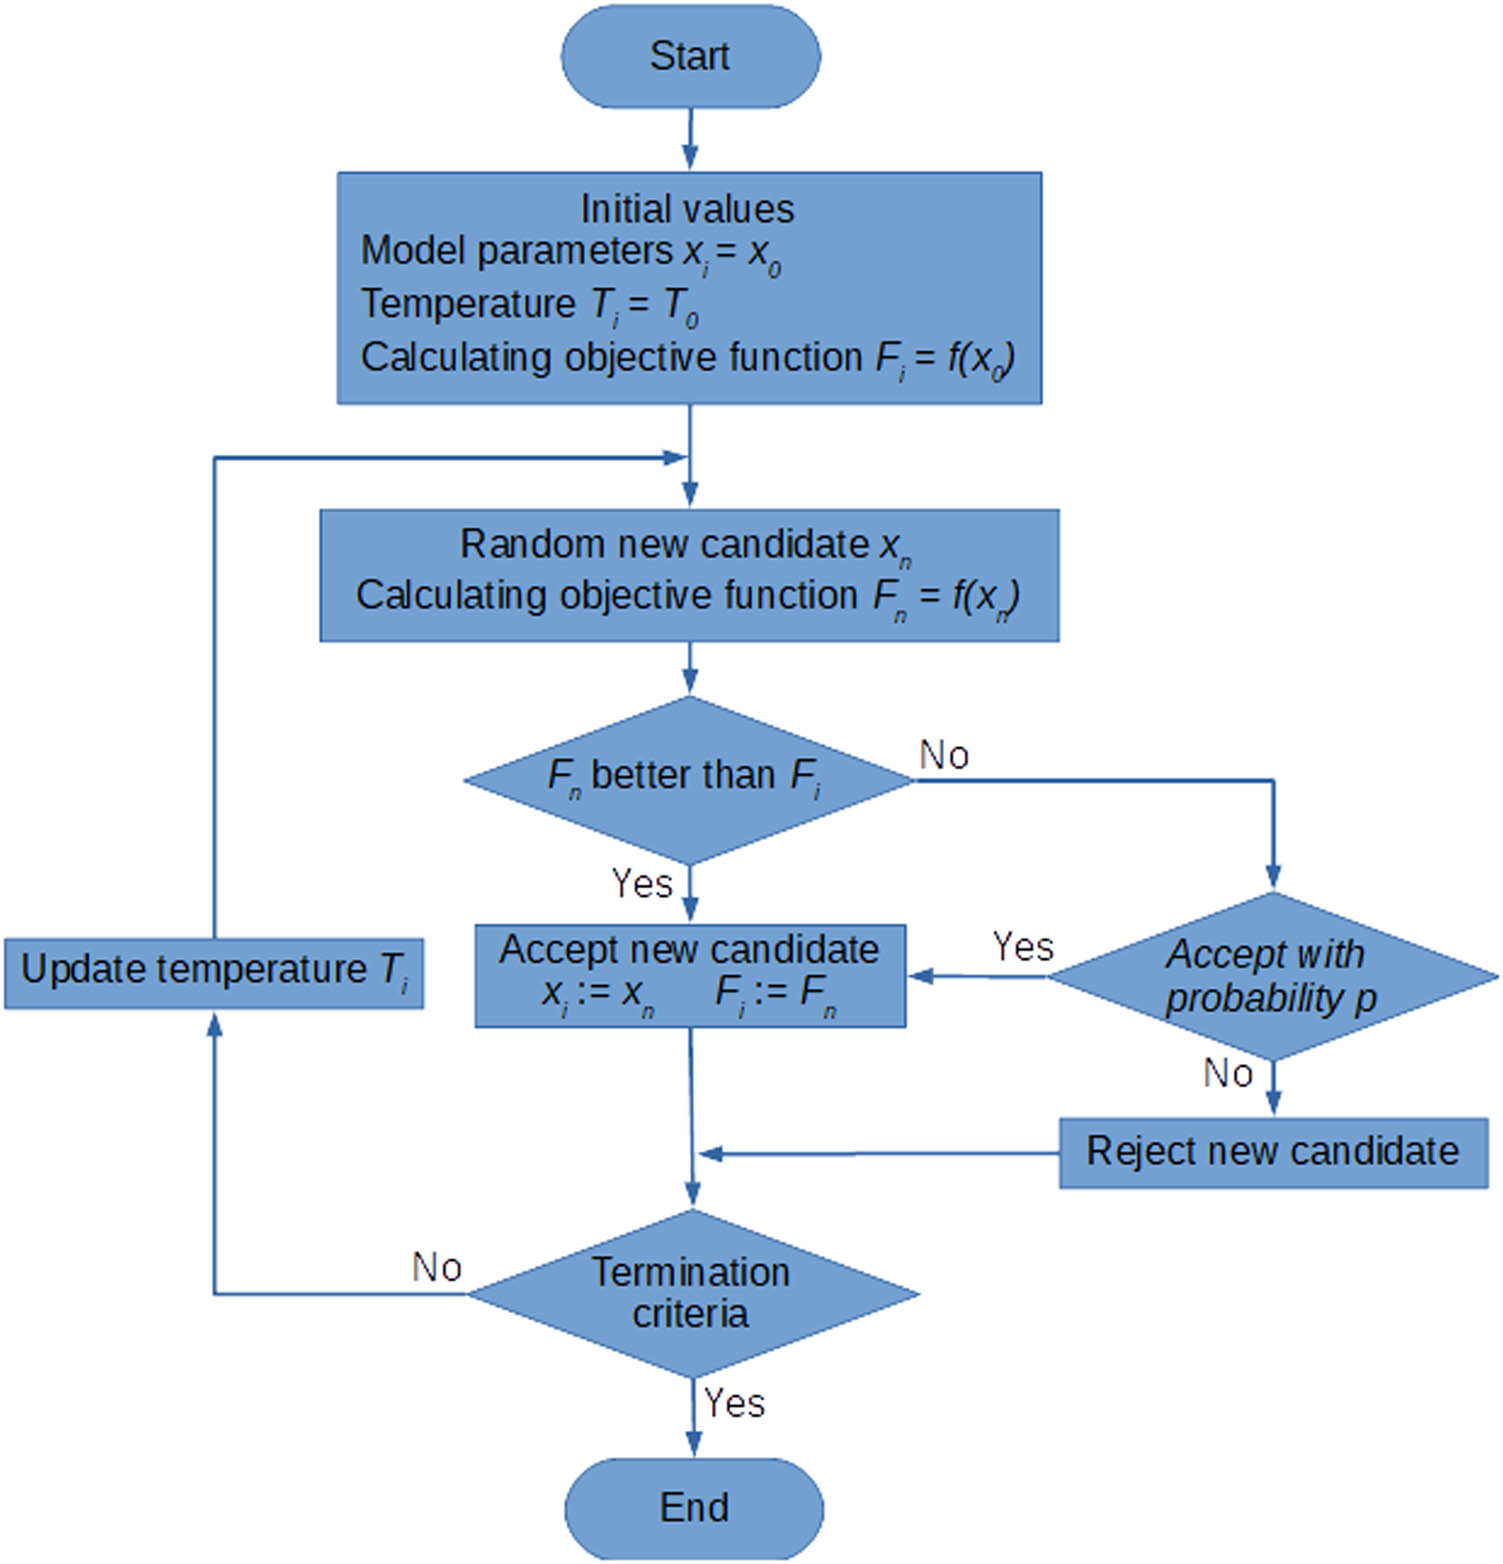

**TSP Visualisation :**

In [142]:
#visualise the TSP
def plotTSP(nodes, coords):
    """
    nodes: List of lists with the different orders in which the nodes are visited
    coords: coordinates for the different nodes
    """

    # plot the cities:
    x = []
    y = []
    for i in nodes[0]:
        x.append(coords[i][0])
        y.append(coords[i][1])
    plt.plot(x, y, 'co')

    # Set a scale for the arrow head (échelle)
    a_scale = float(max(x))/float(100)

    # Draw the path
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(min(x)*1.1, max(x)*1.1)
    plt.ylim(min(y)*1.1, max(y)*1.1)
    plt.show()

**implimentation :**

In [143]:
class SimAnneal(object):
    def __init__(self, coords, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1):
        #coordinates
        self.coords = coords
        #number of cities
        self.N = len(coords)
        #temperature
        self.T = math.sqrt(self.N) if T == -1 else T
        # save inital T
        self.T_save = self.T
        #Cooling factor 
        self.alpha = 0.995 if alpha == -1 else alpha
        #stop when T ~= 0
        self.stopping_temperature = 1e-8 if stopping_T == -1 else stopping_T
        #max number of iterations
        self.stopping_iter = 100000 if stopping_iter == -1 else stopping_iter
        #one path?
        self.iteration = 1
        #list of nodes
        self.nodes = [i for i in range(self.N)]
        #no best solution at the beginning
        self.best_solution = None
        #energy (distance between all cities)
        self.best_fitness = float("Inf")
        #to draw the graph of distance
        self.fitness_list = []

    def initial_solution(self):
        """
        Greedy algorithm to get an initial solution (closest-neighbour).
        """
        #choose a random node
        cur_node = random.choice(self.nodes)
        #init the solution (list)
        solution = [cur_node] 
        #unvisited nodes
        free_nodes = set(self.nodes)
        #choosen nodes not free any more!
        free_nodes.remove(cur_node)
        #for all cities get the nearest neighbor add him to list and mark him as visited!
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.dist(cur_node, x))
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node
        #get the distance between all nodes of the solution
        cur_fit = self.fitness(solution)
        #If best found so far, update best fitness
        if cur_fit < self.best_fitness:
            self.best_fitness = cur_fit
            self.best_solution = solution
        #add the fitness (distance) to list
        self.fitness_list.append(cur_fit)
        return solution, cur_fit
   
    def dist(self, node_0, node_1):
        """
        Euclidean distance between two nodes.
        """
        #get the coordinates
        coord_0, coord_1 = self.coords[node_0], self.coords[node_1]
        #calculate and get the Euclidean distance
        return math.sqrt((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)

    def fitness(self, solution):
        """
        Total distance of the current solution path.
        """
        cur_fit = 0
        #get the distance between node i and i + 1 for all nodes
        for i in range(self.N):
            cur_fit += self.dist(solution[i % self.N], solution[(i + 1) % self.N])
        return cur_fit

    def p_accept(self, candidate_fitness):
        """
        Probability of accepting if the candidate is worse than current.
        Depends on the current temperature and difference between candidate and current.
        """
        return math.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)

    def accept(self, candidate):
        """
        Accept with probability 1 if candidate is better than current.
        Accept with probabilty p_accept(..) if candidate is worse.
        """
        candidate_fitness = self.fitness(candidate)
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate


    def anneal(self):
        """
        Execute simulated annealing algorithm.
        """
        # Initialize with the greedy algorithm solution.
        self.cur_solution, self.cur_fitness = self.initial_solution()

        print("Starting annealing ...")
        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            #curr solution
            candidate = list(self.cur_solution)
            #random  2 int
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            # modify the solution from i to i+l
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            #see if the new one is accepted or not
            self.accept(candidate)
            # update T
            self.T *= self.alpha
            # +1 iteration
            self.iteration += 1
            #add the distance to list
            self.fitness_list.append(self.cur_fitness)
        #min distance
        print("Best fitness obtained: ", self.best_fitness)
        #diff between simulated aneeling and gready algorithm
        improvement = 100 * (self.fitness_list[0] - self.best_fitness) / (self.fitness_list[0])
        print(f"Improvement over greedy heuristic: {improvement : .2f}%")

    def visualize_routes(self):
        """
        Visualize the TSP route with matplotlib.
        """
        plotTSP([self.best_solution], self.coords)

    def plot_learning(self):
        """
        Plot the fitness through iterations.
        """
        plt.plot([i for i in range(len(self.fitness_list))], self.fitness_list)
        plt.ylabel("Fitness")
        plt.xlabel("Iteration")
        plt.show()

Starting annealing ...
Best fitness obtained:  664.8171358126465
Improvement over greedy heuristic:  18.08%


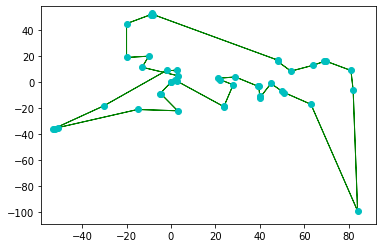

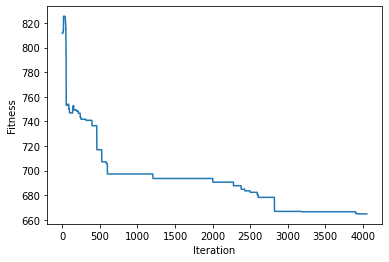

In [144]:
#read the coordinates from a list of [x,y]
def read_coords(path):
    coords = []
    with open(path, "r") as f:
        for line in f.readlines():
            line = [float(x.replace("\n", "")) for x in line.split(" ")]
            coords.append(line)
    return coords

# to generate a list of 100 random coordinates
def generate_random_coords(num_nodes):
    return [[random.uniform(-1000, 1000), random.uniform(-1000, 1000)] for i in range(num_nodes)]


if __name__ == "__main__":
    coords = read_coords("/content/drive/MyDrive/datasets/simulated-annealing-tsp/coord.txt")  # read the coordinates
    sa = SimAnneal(coords, stopping_iter=5000) # read coords and set max iter to 5000
    sa.anneal() # run sa
    sa.visualize_routes() # draw the paths
    sa.plot_learning() # plot the fitness/energie